## Boring Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
from conf import LisaLogging
LisaLogging.setup()
logging.getLogger('Trace').setLevel(logging.ERROR)

import json
import os
import trappy
from trace import Trace
from executor import Executor

import numpy as np
import pandas as pd

from bart.common.Utils import select_window, area_under_curve

from trappy.stats.Topology import Topology

from perf_analysis import PerfAnalysis

2016-12-12 17:34:49,895 INFO    : root         : Using LISA logging configuration:
2016-12-12 17:34:49,896 INFO    : root         :   /home/brejac01/sources/lisa/logging.conf


In [2]:
from trappy import ILinePlot


In [3]:
from tests.eas.generic import EnergyModelWakeMigration

2016-12-12 17:34:50,252 WARNING : EnergyModel  : Unusual max capacity (1023), overriding capacity_scale


In [4]:
events = [
            "sched_overutilized",
            "sched_migrate_task",
            "sched_load_avg_task",
            "sched_load_avg_cpu",
            "sched_switch",
            "cpu_idle",
            "cpu_frequency",
            "irq*"
        ]

## Running Workload

In [5]:
t = EnergyModelWakeMigration(methodName="test_task_placement")

In [6]:
t.setUpClass()

2016-12-12 17:34:50,288 INFO    : LisaTest     : Setup tests execution engine...
2016-12-12 17:34:50,288 INFO    : TestEnv      : Using base path: /home/brejac01/sources/lisa
2016-12-12 17:34:50,289 INFO    : TestEnv      : Loading default (file) target configuration
2016-12-12 17:34:50,290 INFO    : TestEnv      : Loading target configuration [/home/brejac01/sources/lisa/target.config]...
2016-12-12 17:34:50,291 INFO    : TestEnv      : Loading custom (inline) test configuration
2016-12-12 17:34:50,292 INFO    : TestEnv      : Devlib modules to load: ['bl', u'cpuidle', 'cpufreq']
2016-12-12 17:34:50,292 INFO    : TestEnv      : Connecting linux target:
2016-12-12 17:34:50,293 INFO    : TestEnv      :   username : brendan
2016-12-12 17:34:50,293 INFO    : TestEnv      :       host : 192.168.2.2
2016-12-12 17:34:50,294 INFO    : TestEnv      :   password : password
2016-12-12 17:34:50,294 INFO    : TestEnv      : Connection settings:
2016-12-12 17:34:50,295 INFO    : TestEnv      :    {

2016-12-12 17:35:29,664 INFO    : Executor     : Collected FTrace binary trace:
2016-12-12 17:35:29,665 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:wake_migration/1/trace.dat
2016-12-12 17:35:29,667 INFO    : Executor     : Collected FTrace function profiling:
2016-12-12 17:35:29,668 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:wake_migration/1/trace_stat.json
2016-12-12 17:35:29,669 INFO    : Executor     : --------------------------------------------------------------------------------
2016-12-12 17:35:29,670 INFO    : Executor     : 
2016-12-12 17:35:29,671 INFO    : Executor     : ################################################################################
2016-12-12 17:35:29,672 INFO    : Executor     : Experiments execution completed
2016-12-12 17:35:29,673 INFO    : Executor     : ################################################################################
2016-12-12 17:35:29,675 INFO    : Executor     : Results available in:
2016-12-12 17:35:29,

In [7]:
experiment = t.executor.experiments[0]

In [8]:
utils = t.get_task_utils_df(experiment)

2016-12-12 17:35:30,080 INFO    : Analysis     : Registering trace analysis modules:
2016-12-12 17:35:30,082 INFO    : Analysis     :    tasks
2016-12-12 17:35:30,083 INFO    : Analysis     :    eas
2016-12-12 17:35:30,085 INFO    : Analysis     :    latency
2016-12-12 17:35:30,087 INFO    : Analysis     :    frequency
2016-12-12 17:35:30,088 INFO    : Analysis     :    functions
2016-12-12 17:35:30,090 INFO    : Analysis     :    idle
2016-12-12 17:35:30,091 INFO    : Analysis     :    status
2016-12-12 17:35:30,093 INFO    : Analysis     :    cpus


In [9]:
cpus = t.get_task_cpu_df(experiment)

2016-12-12 17:35:30,223 INFO    : Analysis     : Registering trace analysis modules:
2016-12-12 17:35:30,225 INFO    : Analysis     :    tasks
2016-12-12 17:35:30,225 INFO    : Analysis     :    eas
2016-12-12 17:35:30,226 INFO    : Analysis     :    latency
2016-12-12 17:35:30,227 INFO    : Analysis     :    frequency
2016-12-12 17:35:30,228 INFO    : Analysis     :    functions
2016-12-12 17:35:30,229 INFO    : Analysis     :    idle
2016-12-12 17:35:30,230 INFO    : Analysis     :    status
2016-12-12 17:35:30,231 INFO    : Analysis     :    cpus


In [10]:
estimated_power = t.get_power_df(experiment)

2016-12-12 17:35:30,307 INFO    : Analysis     : Registering trace analysis modules:
2016-12-12 17:35:30,308 INFO    : Analysis     :    tasks
2016-12-12 17:35:30,309 INFO    : Analysis     :    eas
2016-12-12 17:35:30,310 INFO    : Analysis     :    latency
2016-12-12 17:35:30,311 INFO    : Analysis     :    frequency
2016-12-12 17:35:30,311 INFO    : Analysis     :    functions
2016-12-12 17:35:30,312 INFO    : Analysis     :    idle
2016-12-12 17:35:30,313 INFO    : Analysis     :    status
2016-12-12 17:35:30,314 INFO    : Analysis     :    cpus


In [11]:
expected_power = t.get_expected_power_df(experiment)

2016-12-12 17:35:30,401 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:35:30,403 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:35:30,404 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:35:30,407 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:35:30,408 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:35:30,410 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:35:30,411 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:35:30,413 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:35:30,414 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:35:30,416 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:35:30,417 I

## Plot Schedule

In [12]:
trace = t.get_trace(experiment)

trappy.plotter.plot_trace(trace.ftrace)

2016-12-12 17:35:30,487 INFO    : Analysis     : Registering trace analysis modules:
2016-12-12 17:35:30,488 INFO    : Analysis     :    tasks
2016-12-12 17:35:30,489 INFO    : Analysis     :    eas
2016-12-12 17:35:30,490 INFO    : Analysis     :    latency
2016-12-12 17:35:30,491 INFO    : Analysis     :    frequency
2016-12-12 17:35:30,492 INFO    : Analysis     :    functions
2016-12-12 17:35:30,493 INFO    : Analysis     :    idle
2016-12-12 17:35:30,494 INFO    : Analysis     :    status
2016-12-12 17:35:30,495 INFO    : Analysis     :    cpus


In [13]:
df = pd.concat([expected_power, estimated_power], axis=1).fillna(method='ffill')
df = df['power']

df.columns = ['expected', 'estimated']

ILinePlot(df, column=df.columns.tolist(), drawstyle='steps-post').view()

""
""


In [19]:
t.test_task_placement()

2016-12-12 17:37:03,007 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:37:03,012 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:37:03,014 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:37:03,018 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:37:03,020 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:37:03,023 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:37:03,025 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:37:03,029 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:37:03,031 INFO    : EnergyModel  :    EnergyModel - Searching 36 configurations for optimal task placement...
2016-12-12 17:37:03,034 INFO    : EnergyModel  :    EnergyModel - Done
2016-12-12 17:37:03,036 I

## Find which resources over-used energy

Sum the energy used by each component over the period of workload execution.

In [14]:
df = expected_power
window = t.get_window(experiment)
estimated = {}
for column in df.columns:
    estimated[column] = area_under_curve(df[column]) / (window[1] - window[0])

# estimated["power"] should be the some of the other values (w/ rounding errors)
assert (estimated["power"] - (sum(estimated.values()) - estimated["power"])) < 0.1

print("Average estimated system power: %s bogo-Watts" % estimated["power"])

Average estimated system power: 286.281247208 bogo-Watts


Get expected (ideal) energy usage

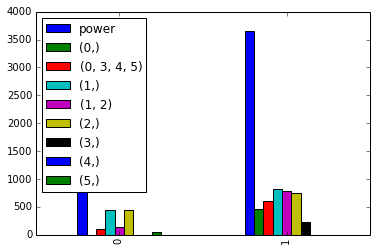

In [15]:
pd.DataFrame([expected_power.sum().to_dict(), estimated_power.sum().to_dict()]).plot(kind='bar', sharex=True)

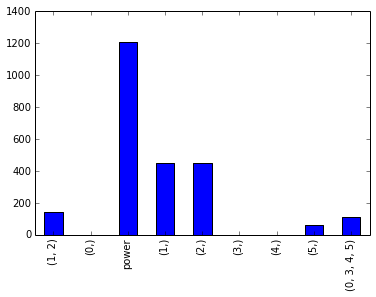

In [16]:
expected_power.sum().plot(kind='bar')

In [18]:
def task_capacity(task):
    # Must be a single-phase task
    [phase] = rtapp_params[task]["phases"].values()
    return (phase["run"] / float(phase["timer"]["period"]) * energy_model.capacity_scale)

capacities = {t: task_capacity(t) for t in experiment.wload.tasks}
_, utils = energy_model._find_optimal_placements(capacities)

NameError: global name 'rtapp_params' is not defined

In [ ]:
def distance_sq(a, b):
    # Return the square of the distance between two n-dimensional points
    return sum([(ai - bi) ** 2 for ai, bi in zip(a, b)])


In [ ]:
estimated = estimated_power.sum().to_dict()

def distance_sq(a, b):
    # Return the square of the distance between two n-dimensional points
    return sum([(ai - bi) ** 2 for ai, bi in zip(a, b)])
def distance_from_observed(util):
    keys = estimated.keys()
    power = energy_model.estimate_from_cpu_util(util, combine=True)
    return distance_sq([power[k] for k in keys], [estimated[k] for k in keys])

# Find the utilization distribution (task placement) that would give the most similar energy profile to the one observed
utils
util = min(utils, key=distance_from_observed)
print util
expected = energy_model.estimate_from_cpu_util(util, combine=True)

In [ ]:
expected_old = {'power': 139.76043360433604,
 (0,): 0.0,
 (0, 1, 2, 3): 63.708943089430896,
 (1,): 0.0,
 (2,): 0.0,
 (3,): 76.05149051490514,
 (4,): 0.0,
 (4, 5, 6, 7): 0.0,
 (5,): 0.0,
 (6,): 0.0,
 (7,): 0.0}

In [ ]:
energy_model.estimate_from_cpu_util(util)

Show how much extra energy each component seemed to use

In [ ]:
def df_for_graph(power):
    # Convert a dict to a DataFrame that can be used to display a bar graph
    # Order the bars by key length - so CPU-level numbers are first, then cluster numbers, then the total ("power")
    items = sorted(power.items(), key=lambda (k, v): len(k))
    [keys, vals] = zip(*items)
    return pd.DataFrame(list(vals), index=list(keys))

assert estimated.keys() == expected.keys()

df_exp = df_for_graph(expected)
df_est = df_for_graph(estimated)

df = pd.concat([df_exp, df_est], axis=1, join_axes=[df_exp.index])
df.columns = ["expected", "estimated"]
df.plot(kind="bar")

In [ ]:
trace.analysis.cpus.plotCPU()

In [ ]:
trace.analysis.frequency.plotClusterFrequencies()

In [ ]:
trace.analysis.cpus.plotCPU()

In [ ]:
trace.analysis.idle.plotClusterIdleStateResidency()
trace.analysis.idle.plotCPUIdleStateResidency()